In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(np.max(y_train))

(60000, 28, 28)
(60000,)
9


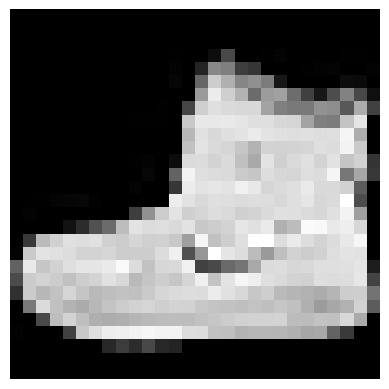

In [ ]:
# Visualize a sample image
plt.imshow(X_train[0], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Standardize the data
X_flattened = X_train.reshape(X_train.shape[0], -1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_flattened)

print(X_standardized.shape)

(60000, 784)


In [ ]:
# Import PCA from scikit-learn
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
k = 2  # Number of principal components
pca = PCA(n_components=k)

# Fit PCA on the standardized data
X_pca_sklearn = pca.fit_transform(X_standardized)

print(X_pca_sklearn.shape)

(60000, 2)


In [ ]:
# Display the explained variance ratio
print("Explained Variance Ratio by scikit-learn PCA:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f}")

Explained Variance Ratio by scikit-learn PCA:
PC1: 0.2208
PC2: 0.1441


In [ ]:
# Create a DataFrame with the projected data
principal_df_sklearn = pd.DataFrame(X_pca_sklearn, columns=[f'PC{i+1}' for i in range(k)])
principal_df_sklearn['label'] = y_train



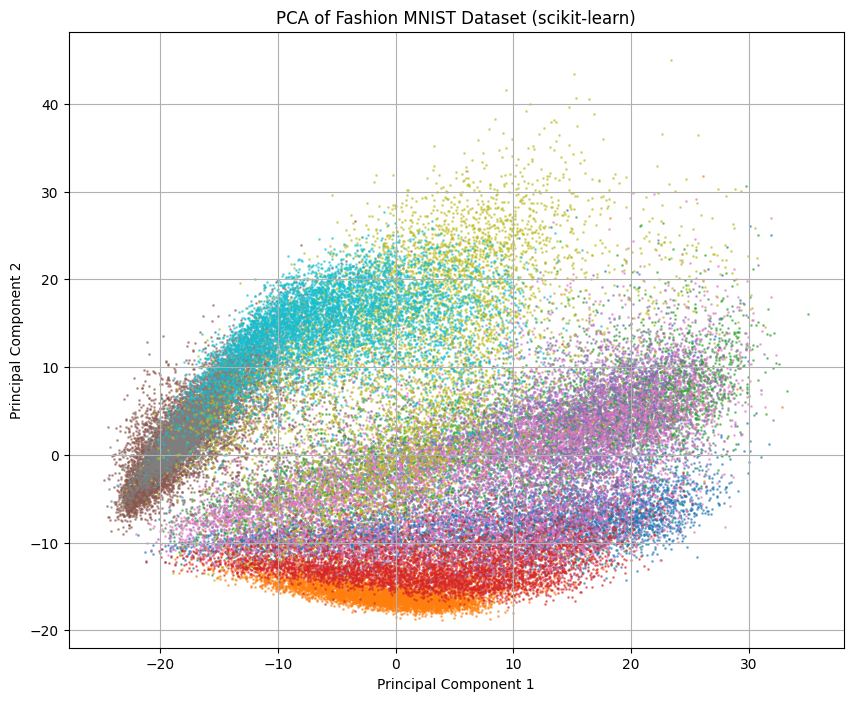

In [ ]:
# Plot the projected data using scikit-learn PCA
plt.figure(figsize=(10, 8))

# No sampling - use the entire dataset
for label in np.unique(principal_df_sklearn['label']):
    label_indices = principal_df_sklearn['label'] == label
    plt.scatter(principal_df_sklearn.loc[label_indices, 'PC1'],
                principal_df_sklearn.loc[label_indices, 'PC2'],
                s=1, alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Fashion MNIST Dataset (scikit-learn)')
plt.grid()
plt.show()

In [ ]:
# Optional: Experiment with different numbers of components
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Define a logistic regression model
model = LogisticRegression(max_iter=100)

# Stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation with PCA
pca = PCA(n_components=5, random_state=42)
X_pca = pca.fit_transform(X_standardized)

scores_no_pca = cross_val_score(model, X_pca, y_train, cv=cv, scoring='accuracy')
mean_score_no_pca = np.mean(scores_no_pca)

print(f"\nCross-validation accuracy without PCA: {mean_score_no_pca:.4f}")



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Cross-validation accuracy without PCA: 0.6921


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
!pip install umap-learn

In [ ]:
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [ ]:
# Apply t-SNE to reduce to 2 dimensions
X_flattened = X_test.reshape(X_test.shape[0], -1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_flattened)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standardized)


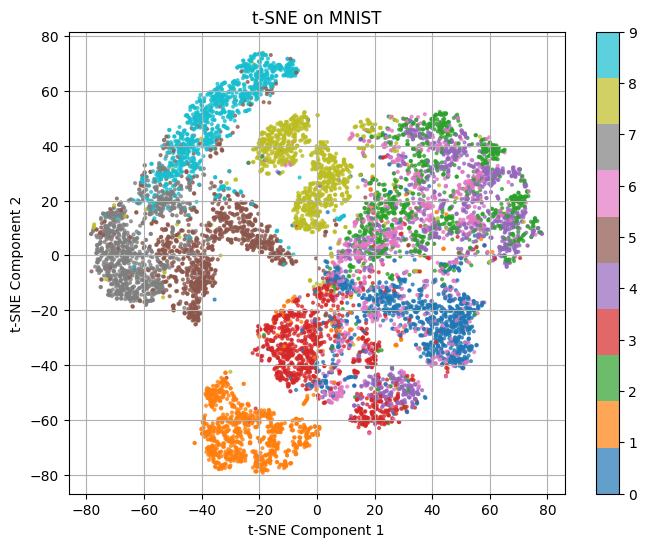

In [ ]:
# Plot the t-SNE result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_test, cmap='tab10', s=4, alpha=0.7)
plt.title('t-SNE on MNIST')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()

In [ ]:
# Apply UMAP to reduce to 2 dimensions
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_standardized)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


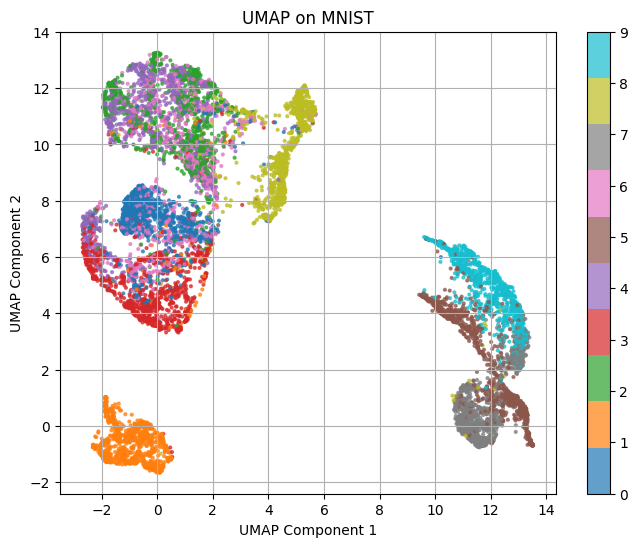

In [ ]:
# Plot the UMAP result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_test, cmap='tab10', s=4, alpha=0.7)
plt.title('UMAP on MNIST')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, ticks=range(10))
plt.grid(True)
plt.show()

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


print(f"Training data: {training_data}\n")
print(f"Test data: {test_data}")

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 523kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.14MB/s]

Training data: Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Test data: Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Iterate over the data
for x, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {x.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


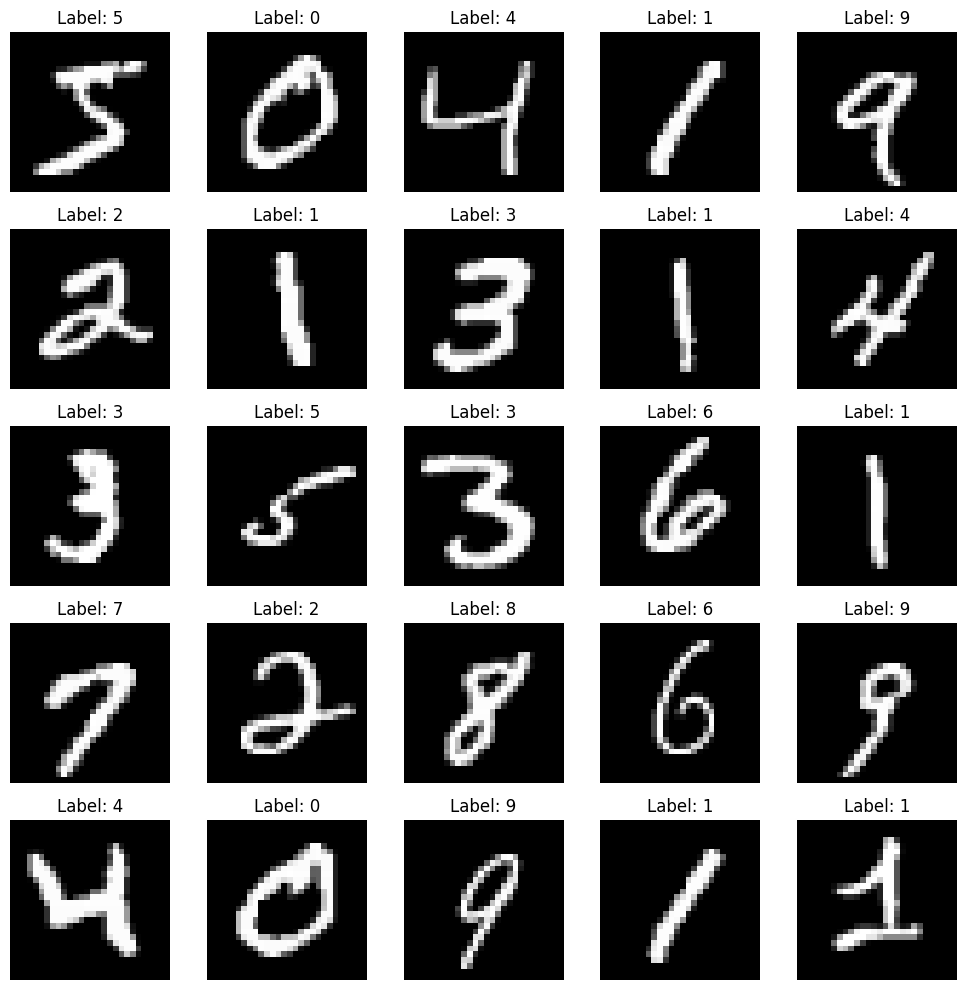

In [4]:
from matplotlib import pyplot as plt

def visualize(images, labels):
    """
    Visualize a batch of images.
    """
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f'Label: {labels[i].item()}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

images, labels = next(iter(train_dataloader))

visualize(images, labels)

In [5]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [7]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [9]:
from tqdm import trange
# Number of epochs we wish to train the model
epoch = 5

for epochs in (range(epoch)):
    # Iterate over the data
    for x, y in train_dataloader:
        # Move the datapoints to same device as the model
        x, y = x.to(device), y.to(device)
        # Clear the gradients
        optimizer.zero_grad()
        # Predict the output and perform the forward pass
        pred = model(x)
        # Compute prediction error
        loss = loss_fn(pred, y)
        # Backpropagation
        loss.backward()
        # Update the model weights
        optimizer.step()
    print(f"Epoch {epoch}/{epochs+1}, Loss: {loss.item():.4f}")

Epoch 5/1, Loss: 2.2516
Epoch 5/2, Loss: 2.1850
Epoch 5/3, Loss: 2.0701
Epoch 5/4, Loss: 1.8677
Epoch 5/5, Loss: 1.5617


In [10]:
# Store the number of correctly classified and total labels
correct, total = 0, 0

# Disable gradient calculation
with torch.no_grad():
    # Iterate over the test data
    for x, y in test_dataloader:
        # Move the datapoints to same device as the model
        x, y = x.to(device), y.to(device)
        # Predict the output
        logits = model(x)
        # Get the predicted label
        pred = torch.argmax(logits, axis=1)
        # Update the number of correclty classified labels
        correct += sum(pred == y).item()
        # Update the number of total labels
        total += pred.shape[0]

print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 72.80%


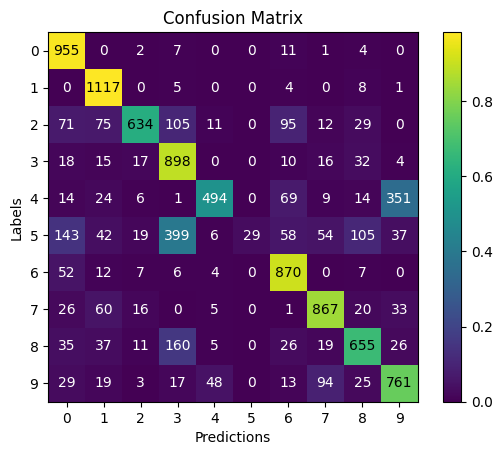

In [11]:
def plot_conf_mat(model, dataloader, device):
    """
    Plot the confusion matrix for a given model and dataloader.
    """
    # Initialize the confusion matrix
    total, correct = 0, 0
    conf_mat = torch.zeros((10, 10))
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            total += pred.shape[0]
            pred = torch.argmax(pred, axis=1)
            correct += sum(pred == y).item()
            for j in range(pred.shape[0]):
                conf_mat[y[j], pred[j].item()] += 1
    # calculate the normalized confusion matrix
    norm_conf_mat = conf_mat / torch.sum(conf_mat, axis=1)
    # plot the matrix
    fig, ax = plt.subplots()
    plt.imshow(norm_conf_mat)
    plt.title('Confusion Matrix')
    plt.xlabel('Predictions')
    plt.ylabel('Labels')
    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.colorbar()
    # put number of each cell in plot
    for i in range(10):
        for j in range(10):
            c = conf_mat[j, i]
            color = 'black' if c > 500 else 'white'
            ax.text(i, j, str(int(c)), va='center', ha='center', color=color)
    plt.show()

plot_conf_mat(model, test_dataloader, device)

Dropdown(description='Optimizer:', layout=Layout(width='200px'), options=('SGD', 'AdaGrad', 'RMSProp', 'Adam')…


AdaGrad


Loss = 0.193 | Accuracy = 94.54% : 100%|██████████| 10/10 [01:14<00:00,  7.45s/it]


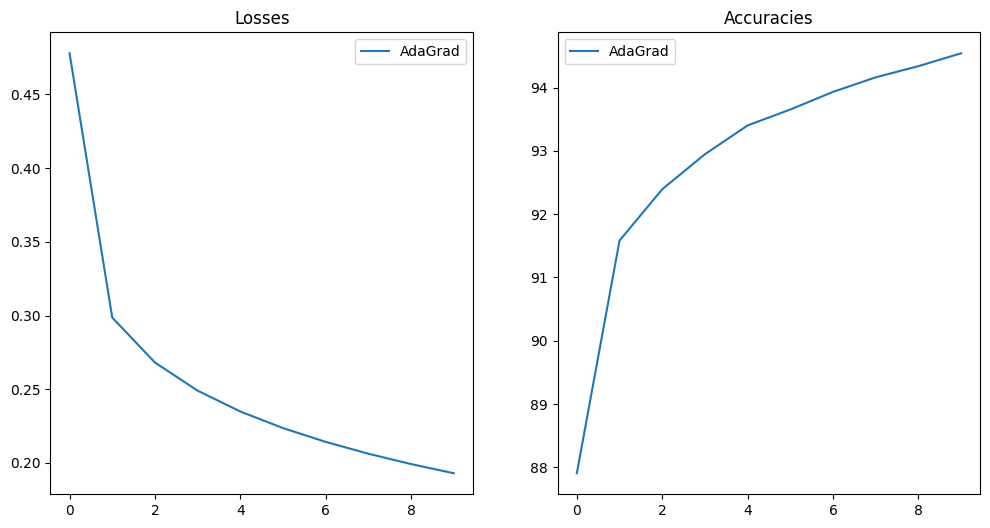


SGD


Loss = 1.657 | Accuracy = 70.68% : 100%|██████████| 10/10 [01:11<00:00,  7.13s/it]


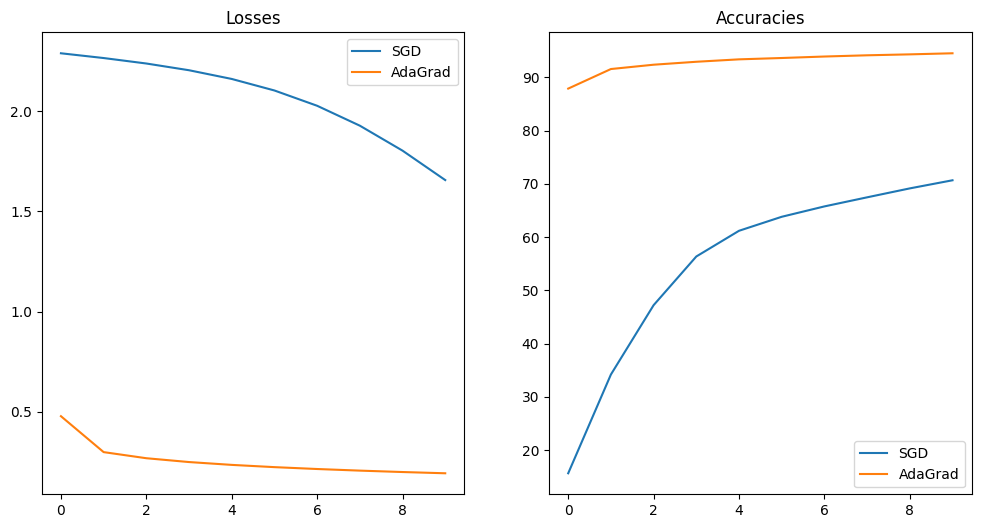

In [13]:
import ipywidgets as widgets
from IPython.display import display

train_dataloader = DataLoader(training_data, batch_size=128)

def train_model(model, optimizer, n_epochs=10):
    losses, accuracies = [], []
    for _ in (pbar := trange(n_epochs)):
        running_loss, acc = 0, 0
        for x, y in train_dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            running_loss += loss.item()
            pred = torch.argmax(pred, axis=1)
            acc += sum(pred == y).item()
        acc /= len(train_dataloader.dataset)
        acc *= 100
        running_loss /= len(train_dataloader)
        losses.append(running_loss)
        accuracies.append(acc)
        pbar.set_description(f'Loss = {running_loss:.3f} | Accuracy = {acc:.2f}% ')
    return losses, accuracies


def plot_losses_accuracies(results):
    fig, axes = plt.subplots(1, 2)
    for optimizer, res in results.items():
        if 'losses' not in res or 'accuracies' not in res:
            continue
        losses = res['losses']
        accuracies = res['accuracies']
        axes[0].plot(losses, label=optimizer)
        axes[1].plot(accuracies, label=optimizer)
    axes[0].set_title('Losses')
    axes[1].set_title('Accuracies')
    axes[0].legend()
    axes[1].legend()
    fig.set_size_inches(12, 6)
    plt.show()


# Create a list of values
options = ['SGD', 'AdaGrad', 'RMSProp', 'Adam']

# Create a dropdown widget with custom layout
dropdown = widgets.Dropdown(
    options=options,
    description='Optimizer:',
    layout={'width': '200px'},
    style={'description_width': 'initial'}

)

# Define a function to run based on selected value
def on_value_change(change):
    optimizer = change['new']
    global first_run, resuts
    model = NeuralNetwork().to(device)
    if results[optimizer] != {}:
        losses = results[optimizer]['losses']
        accuracies = results[optimizer]['accuracies']
        plot_losses_accuracies(results)
        return
    if optimizer == 'SGD':
        opt = torch.optim.SGD(model.parameters(), lr=1e-3)
    elif optimizer == 'AdaGrad':
        opt = torch.optim.Adagrad(model.parameters(), lr=1e-3)
    elif optimizer == 'RMSProp':
        opt = torch.optim.RMSprop(model.parameters(), lr=1e-3)
    elif optimizer == 'Adam':
        opt = torch.optim.Adam(model.parameters(), lr=1e-3)
    print(f'\n{optimizer}')
    losses, accuracies = train_model(model, opt)
    results[optimizer]['losses'] = losses
    results[optimizer]['accuracies'] = accuracies
    plot_losses_accuracies(results)



# Observe changes in the dropdown value
dropdown.observe(on_value_change, names='value')

results = {optimizer: dict() for optimizer in options}

# on_value_change({"new": 'SGD'})

# Display the widget
display(dropdown)